In [143]:
# import libraries and read csv files directly from csv files 
# concatenate them and store in a dataframe
# add name column to the dataframe from name of the files

import pandas
import numpy as np
import os
import scipy.stats as stats
import datetime as dt
#combine csv files
#assign filenames as Name column's value...
folder_path = "all-365-days-csv"
df_list = []
for file in os.listdir('all-365-days-csv'):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, delimiter=";")
        df['Name'] = os.path.splitext(file)[0]
        df_list.append(df)
        

combined_df = pd.concat(df_list)

#cleaning Name columns

combined_df['Name'] = combined_df['Name'].apply(lambda x: x.strip())
combined_df['Name'] = combined_df['Name'].str[:-48]
df = combined_df.copy()

In [144]:
# select 40 random csv files directly from the folder of files:
all_csv_files = [f for f in os.listdir("all-365-days-csv") if f.endswith('.csv')]
selected_files = random.sample(all_csv_files, 40)
samples = []
for file in selected_files:
    temp = pd.read_csv(os.path.join('all-365-days-csv', file), delimiter = ";")
    samples.append(temp)

sample_df = pd.concat(samples, ignore_index=True)

In [145]:
sample_df.describe()

,open,high,low,close,volume,marketCap
count,14145.000000,14145.000000,14145.000000,14145.000000,1.414500e+04,1.414500e+04
mean,15.802027,16.146025,15.454040,15.792252,8.319853e+07,2.134446e+09
std,49.701348,50.668904,48.732489,49.678783,1.879825e+08,7.107184e+09
min,0.000007,0.000007,0.000006,0.000007,2.135794e+05,0.000000e+00
25%,0.052309,0.053639,0.051137,0.052286,5.450167e+06,1.826808e+08
50%,0.429136,0.447340,0.411834,0.427934,1.782584e+07,4.126895e+08
75%,3.741896,3.843459,3.608403,3.720575,6.473250e+07,1.147196e+09
max,354.419456,388.715525,347.019616,354.406383,5.390604e+09,5.669691e+10


In [146]:
#Estimation question
data = sample_df['volume']
mean = data.mean()
se = stats.sem(data)

# calculate the 98% confidence interval
confidence_interval = stats.t.interval(alpha=0.98, df=len(data)-1, loc=mean, scale=se)
print("in our case The 98% confidence interval for the mean volume(24h) is:", confidence_interval)

in our case The 98% confidence interval for the mean volume(24h) is: (79521133.74565172, 86875917.57876256)


In [147]:
#hypothesis 1:
#define new column for weekdays names

df['day'] = pd.to_datetime(df.timestamp)
df['day']  = df['day'].apply(lambda x: x.day_name())

#calculate mean of daily price changes
df['daily_change'] = df['close'] - df['open']
mean_change_sched_1 = df[df['day'].isin(['Thursday', 'Friday', 'Saturday'])]['daily_change'].mean()
mean_change_sched_2 = df[df['day'].isin(['Monday', 'Tuesday', 'Wednesday'])]['daily_change'].mean()


# perform independent t-test
sched_1 = df[df['day'].isin(['Thursday', 'Friday', 'Saturday'])]['daily_change']
sched_2 = df[df['day'].isin(['Monday', 'Tuesday', 'Wednesday'])]['daily_change']
t_stat, p_val = stats.ttest_ind(sched_1, sched_2)

print("mean_change_sched_1: ", mean_change_sched_1, "\nmean_change_sched_2: ",  mean_change_sched_2 ,"\nt_stat: ", t_stat, "\np_val: ", p_val )
if p_val < 0.05:
    print("The difference in mean daily price changes between the two schedules is statistically significant.")
else:
    print("The difference in mean daily price changes between the two schedules is not statistically significant.")

mean_change_sched_1:  0.17441400061616683 
mean_change_sched_2:  -0.23871371428545668 
t_stat:  0.7107051531110641 
p_val:  0.47726979140797066
The difference in mean daily price changes between the two schedules is not statistically significant.


{'whiskers': [<matplotlib.lines.Line2D at 0x1ef25471820>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef25471f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef25471490>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef2547d6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef2547da30>],
 'means': []}

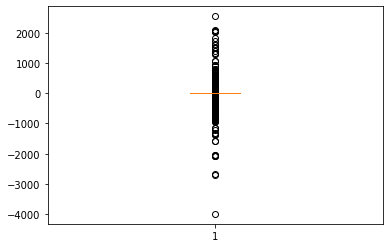

In [148]:
#plot and try to understand distribution
plt.boxplot(df[df['day'].isin(['Monday', 'Tuesday', 'Wednesday'])]['daily_change'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef254dc4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef254dcc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef254dc160>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef254e4370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef254e4700>],
 'means': []}

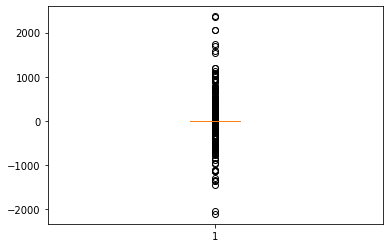

In [149]:
import matplotlib.pyplot as plt
plt.boxplot(df[df['day'].isin(['Thursday', 'Friday', 'Saturday'])]['daily_change'])


In [150]:
# second hypothesis test question:
# null hypothesis: The mean volume of three cryptos {'Ethereum', 'Bitcoin', 'USDt Tether'} is significantly more than the mean volume of other cryptos
top_coins = ['Ethereum', 'Bitcoin', 'USDt Tether']
other_coins = df[~df['Name'].isin(top_coins)]

# calculate mean daily volume for top coins and others
mean_volume_top = df[df['Name'].isin(top_coins)]['volume'].mean()
mean_volume_others = other_coins['volume'].mean()

std_volume_top = df[df['Name'].isin(top_coins)]['volume'].std()
std_volume_others = other_coins['volume'].std()


# calculate z-score
z_score = (mean_volume_top - mean_volume_others) / ((std_volume_top**2/len(top_coins) + std_volume_others**2/len(other_coins))**0.5)

# calculate p-value
#twosided
p_value = stats.norm.sf(abs(z_score))*2 

print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in mean daily trading volumes between the selected coins and the other coins is statistically significant.")
else:
    print("The difference in mean daily trading volumes between the selected coins and the other coins is not statistically significant.")

print(f"Mean daily trading volume for Ethereum, Bitcoin, and USDt Tether: {mean_volume_selected}")
print(f"Mean daily trading volume for other coins: {mean_volume_others}")



Z-score: 2.1557071183632917
P-value: 0.031106541993243444
The difference in mean daily trading volumes between the selected coins and the other coins is statistically significant.
Mean daily trading volume for Ethereum, Bitcoin, and USDt Tether: 15689585265.846895
Mean daily trading volume for other coins: 298555593.08627266
